In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from credentials import DB_USER, USER_PASSWORD
from sqlalchemy import create_engine, types

In [2]:
db_config = {
    'host': 'localhost',
    'user': DB_USER,
    'password': USER_PASSWORD,
    'database': 'phonepe'
}

### 1. Data Collection 


* Connecting with MySQL Database

In [3]:
# Create the connection string using f-string
connection_string = f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

* Getting Aggregated Data From Database

In [4]:
query_for_agg_insu = """SELECT * FROM aggregated_insurance"""

query_for_agg_trans = """SELECT * FROM aggregated_transaction"""

query_for_agg_user = """SELECT * FROM aggregated_user"""

# creating dataframes
df_agg_insu = pd.read_sql(query_for_agg_insu,engine)
df_agg_trans = pd.read_sql(query_for_agg_trans,engine)
df_agg_user = pd.read_sql(query_for_agg_user,engine)

* Seperate the Top States, Top District and Top Pincodes

1. Insurance data

In [5]:
query_for_top_states = """SELECT * FROM top_insurance 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_insurance
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_insurance
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_insu = pd.read_sql(query_for_top_states,engine)
df_top_dist_insu = pd.read_sql(query_for_top_dist,engine)
df_top_pins_insu = pd.read_sql(query_for_top_pins,engine)

2. Transcation Data

In [6]:
query_for_top_states = """SELECT * FROM top_transaction 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_transaction
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_transaction
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_trans = pd.read_sql(query_for_top_states,engine)
df_top_dist_trans = pd.read_sql(query_for_top_dist,engine)
df_top_pins_trans = pd.read_sql(query_for_top_pins,engine)

3. User Data

In [7]:
query_for_top_states = """SELECT * FROM top_user 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_user
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_user
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_user = pd.read_sql(query_for_top_states,engine)
df_top_dist_user = pd.read_sql(query_for_top_dist,engine)
df_top_pins_user = pd.read_sql(query_for_top_pins,engine)

* Getting Map Data

In [8]:
query_for_map_insu = """SELECT * FROM map_insurance_hover"""
query_for_map_trans = """SELECT * FROM map_transaction"""
query_for_map_user = """SELECT * FROM map_user"""

df_map_insu = pd.read_sql(query_for_map_insu,engine)
df_map_trans = pd.read_sql(query_for_map_trans,engine)
df_map_user = pd.read_sql(query_for_map_user,engine)


### 2. Data Cleaning

#### * Aggregated Data

In [9]:
# Storing all the tables in one dict for better access
dataframes = {"Aggregated Insurance":df_agg_insu,"Aggregated Transaction":df_agg_trans,"Aggregated User":df_agg_user}

In [10]:
# displaying the first view of tables
for key,value in dataframes.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Aggregated Insurance table :
   InsuranceCount  InsuranceAmount  Year  Quarter State
0          185348       33732200.0  2020        2  None
1          354284       89495100.0  2020        3  None

Aggregated Transaction table :
            TransactionType  TransactionCount  TransactionAmount  Year  \
0  Recharge & bill payments          72550406       1.447270e+10  2018   
1     Peer-to-peer payments          46982705       1.472460e+11  2018   

   Quarter State  
0        1  None  
1        1  None  

Aggregated User table :
     Brand     Count  RegisteredUsers  Percentage  Year  Quarter State
0   Xiaomi  11926334         46877867    0.254413  2018        1  None
1  Samsung   9609401         46877867    0.204988  2018        1  None



In [11]:
# displaying rows and columns of tables
for key,value in dataframes.items():
  print(f"{key} shape is - {value.shape}")

Aggregated Insurance shape is - (701, 5)
Aggregated Transaction shape is - (5174, 6)
Aggregated User shape is - (6919, 7)


In [12]:
# displaying basic info of tables
for key,value in dataframes.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InsuranceCount   701 non-null    int64  
 1   InsuranceAmount  701 non-null    float64
 2   Year             701 non-null    int64  
 3   Quarter          701 non-null    int64  
 4   State            682 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 27.5+ KB
Aggregated Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionType    5174 non-null   object 
 1   TransactionCount   5174 non-null   int64  
 2   TransactionAmount  5174 non-null   float64
 3   Year               5174 non-null   int64  
 4   Quarter            5174 non-null   int64  
 5   State              5034 non-null   ob

In [13]:
# checking for duplicate values 
for key,value in dataframes.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Aggregated Insurance - 0
No. of duplicates in Aggregated Transaction - 0
No. of duplicates in Aggregated User - 0


In [14]:
# checking for missing values
for key,value in dataframes.items():
  print(f"{key}\n{value.isna().sum()}\n")

Aggregated Insurance
InsuranceCount      0
InsuranceAmount     0
Year                0
Quarter             0
State              19
dtype: int64

Aggregated Transaction
TransactionType        0
TransactionCount       0
TransactionAmount      0
Year                   0
Quarter                0
State                140
dtype: int64

Aggregated User
Brand                0
Count                0
RegisteredUsers      0
Percentage           0
Year                 0
Quarter              0
State              187
dtype: int64



 * Visualizing missing values using Heatmap

In [15]:
# function for plotting heatmap
def plot_heatmap(df,title):
  plt.figure(figsize=(4, 2))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title(f"{title}")
  plt.show()

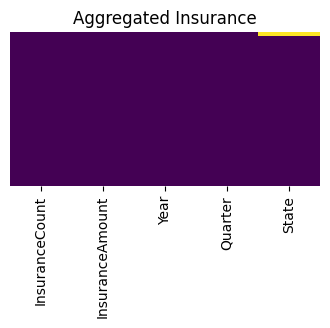

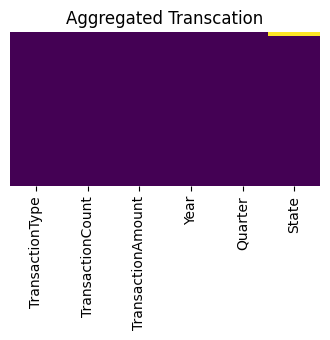

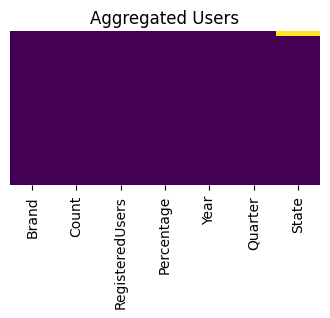

In [16]:
# heatmap for aggregated 
plot_heatmap(df_agg_insu,"Aggregated Insurance")
plot_heatmap(df_agg_trans,"Aggregated Transcation")
plot_heatmap(df_agg_user,"Aggregated Users")

In [17]:
# Displaying Unique Value w.r.t column
for key,value in dataframes.items():
  print(f"Unique values in table {key}")
  for col in value.columns:
    print(f"{col} - {value[col].nunique()}")
  print("\n")

Unique values in table Aggregated Insurance
InsuranceCount - 673
InsuranceAmount - 701
Year - 5
Quarter - 4
State - 36


Unique values in table Aggregated Transaction
TransactionType - 5
TransactionCount - 5106
TransactionAmount - 5168
Year - 7
Quarter - 4
State - 36


Unique values in table Aggregated User
Brand - 20
Count - 6688
RegisteredUsers - 629
Percentage - 6879
Year - 5
Quarter - 4
State - 36




#### * Top Data

In [18]:
# storing all tables inside a dictionary for better access
dataframes1 = {"Top_State":df_top_state_insu,"Top_District":df_top_dist_insu,"Top_Pincode":df_top_pins_insu}
dataframes2 = {"Top_State":df_top_state_trans,"Top_District":df_top_dist_trans,"Top_Pincode":df_top_pins_trans}
dataframes3 = {"Top_State":df_top_state_user,"Top_District":df_top_dist_user,"Top_Pincode":df_top_pins_user}

In [19]:
# storing all the above dict in list each dict represents sub category i.e insurance, user etc.
list = [dataframes1,dataframes2,dataframes3]

# Displaying the fisrt view of tabels
for df in list:
  for key,value in df.items():
    print(f"{key} table :")
    print(f"{value.head(2)}\n")


Top_State table :
      TopState  StateCount  StateAmount  Year  Quarter State TopDistrict  \
0  maharashtra     39836.0    6879720.0  2020        2  None        None   
1    karnataka     27358.0    4794150.0  2020        2  None        None   

  DistCount DistAmount TopPinCode PinCount PinAmount  
0      None       None       None     None      None  
1      None       None       None     None      None  

Top_District table :
  TopState StateCount StateAmount  Year  Quarter      State       TopDistrict  \
0     None       None        None  2020        2  meghalaya  east khasi hills   
1     None       None        None  2020        2  meghalaya            ribhoi   

   DistCount  DistAmount TopPinCode PinCount PinAmount  
0       18.0      3753.0       None     None      None  
1        8.0      1822.0       None     None      None  

Top_Pincode table :
  TopState StateCount StateAmount  Year  Quarter           State TopDistrict  \
0     None       None        None  2020        2  

In [20]:
# displaying the rows and columns of tables
for df in list:
  for key,value in df.items():
    print(f"{key} shape is - {value.shape}")

Top_State shape is - (190, 12)
Top_District shape is - (5798, 12)
Top_Pincode shape is - (6855, 12)
Top_State shape is - (280, 12)
Top_District shape is - (8576, 12)
Top_Pincode shape is - (10277, 12)
Top_State shape is - (280, 7)
Top_District shape is - (8576, 7)
Top_Pincode shape is - (10280, 7)


In [21]:
# displaying the basic info for tables
for df in list:
  for key,value in df.items():
    print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     190 non-null    object 
 1   StateCount   190 non-null    float64
 2   StateAmount  190 non-null    float64
 3   Year         190 non-null    int64  
 4   Quarter      190 non-null    int64  
 5   State        0 non-null      object 
 6   TopDistrict  0 non-null      object 
 7   DistCount    0 non-null      object 
 8   DistAmount   0 non-null      object 
 9   TopPinCode   0 non-null      object 
 10  PinCount     0 non-null      object 
 11  PinAmount    0 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 17.9+ KB
Top_State
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     0 non-null      obj

In [22]:
# checking for duplicates
for df in list:
  for key,value in df.items():
    print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0
No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0
No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0


In [23]:
# checking missing values in each column
for df in list:
  for key,value in df.items():
    print(f"{key}\n{value.isna().sum()}\n")

Top_State
TopState         0
StateCount       0
StateAmount      0
Year             0
Quarter          0
State          190
TopDistrict    190
DistCount      190
DistAmount     190
TopPinCode     190
PinCount       190
PinAmount      190
dtype: int64

Top_District
TopState       5798
StateCount     5798
StateAmount    5798
Year              0
Quarter           0
State           190
TopDistrict       0
DistCount         0
DistAmount        0
TopPinCode     5798
PinCount       5798
PinAmount      5798
dtype: int64

Top_Pincode
TopState       6855
StateCount     6855
StateAmount    6855
Year              0
Quarter           0
State           190
TopDistrict    6855
DistCount      6855
DistAmount     6855
TopPinCode        0
PinCount          0
PinAmount         0
dtype: int64

Top_State
TopState         0
StateCount       0
StateAmount      0
Year             0
Quarter          0
State          280
TopDistrict    280
DistCount      280
DistAmount     280
TopPinCode     280
PinCount       

* Visualization of Missing values using Heatmap

##### 1. Top Insurance

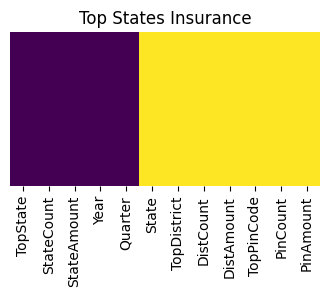

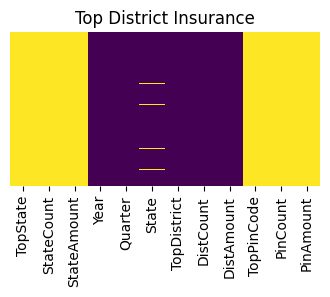

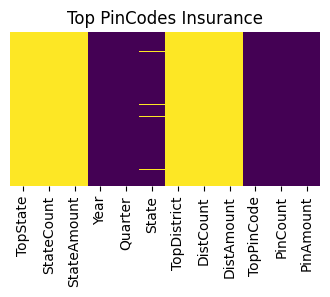

In [24]:
# heatmap for top states
plot_heatmap(df_top_state_insu,"Top States Insurance")  
plot_heatmap(df_top_dist_insu,"Top District Insurance")
plot_heatmap(df_top_pins_insu,"Top PinCodes Insurance")

* Handling missing values

In [25]:
print(f"Total rows: {len(df_top_dist_insu)}")
print(f"Rows with null 'State': {df_top_dist_insu['State'].isna().sum()}")
print(f"% missing: {df_top_dist_insu['State'].isna().mean() * 100:.2f}%\n")

print(f"Total rows: {len(df_top_pins_insu)}")
print(f"Rows with null 'State': {df_top_pins_insu['State'].isna().sum()}")
print(f"% missing: {df_top_pins_insu['State'].isna().mean() * 100:.2f}%")

Total rows: 5798
Rows with null 'State': 190
% missing: 3.28%

Total rows: 6855
Rows with null 'State': 190
% missing: 2.77%


Although missing data For State can be sensitive, in this case, relying on inferred or replaced values may compromise accuracy. Since the percentage of missing values is less than 5%, dropping these rows is a safer and more reliable approach, and it is unlikely to have any significant impact on the overall analysis.

In [26]:
# Droping missing values form state column
df_top_dist_insu.dropna(subset=['State'], inplace=True)
df_top_pins_insu.dropna(subset=['State'], inplace=True)

In [27]:
# droping un-necessary colums
df_top_state_insu.drop(['State','TopDistrict', 'DistCount', 'DistAmount', 'TopPinCode', 'PinCount','PinAmount'],axis=1,inplace=True)
df_top_dist_insu.drop(['TopState', 'StateCount', 'StateAmount','TopPinCode', 'PinCount','PinAmount'], axis=1, inplace=True)
df_top_pins_insu.drop(['TopState', 'StateCount', 'StateAmount','TopDistrict', 'DistCount', 'DistAmount'], axis=1, inplace=True)

##### 2. Top Transaction

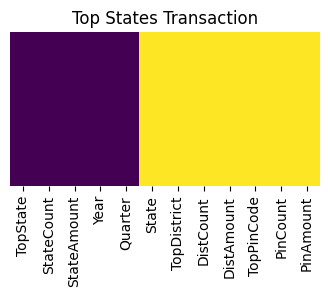

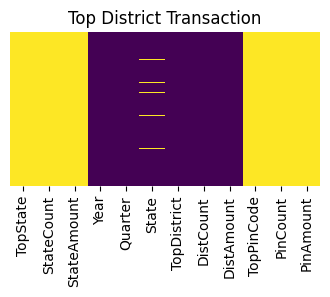

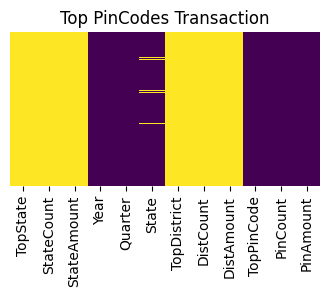

In [28]:
plot_heatmap(df_top_state_trans,"Top States Transaction")
plot_heatmap(df_top_dist_trans,"Top District Transaction")
plot_heatmap(df_top_pins_trans,"Top PinCodes Transaction")

In [29]:
print(f"Total rows: {len(df_top_dist_trans)}")
print(f"Rows with null 'State': {df_top_dist_trans['State'].isna().sum()}")
print(f"% missing: {df_top_dist_trans['State'].isna().mean() * 100:.2f}%\n")

print(f"Total rows: {len(df_top_pins_trans)}")
print(f"Rows with null 'State': {df_top_pins_trans['State'].isna().sum()}")
print(f"% missing: {df_top_pins_trans['State'].isna().mean() * 100:.2f}%")

Total rows: 8576
Rows with null 'State': 280
% missing: 3.26%

Total rows: 10277
Rows with null 'State': 280
% missing: 2.72%


In [30]:
# Droping missing values form state column
df_top_dist_trans.dropna(subset=['State'], inplace=True)
df_top_pins_trans.dropna(subset=['State'], inplace=True)

In [31]:
# droping un-necessary colums
df_top_state_trans.drop(['State','TopDistrict', 'DistCount', 'DistAmount', 'TopPinCode', 'PinCount','PinAmount'],axis=1,inplace=True)
df_top_dist_trans.drop(['TopState', 'StateCount', 'StateAmount','TopPinCode', 'PinCount','PinAmount'], axis=1, inplace=True)
df_top_pins_trans.drop(['TopState', 'StateCount', 'StateAmount','TopDistrict', 'DistCount', 'DistAmount'], axis=1, inplace=True)

##### 3. Top Users

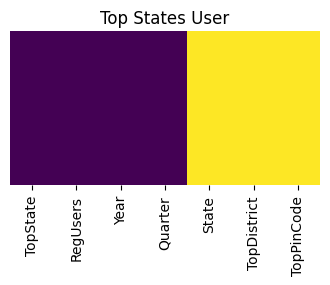

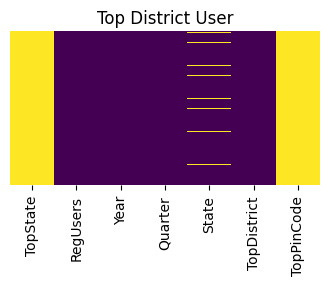

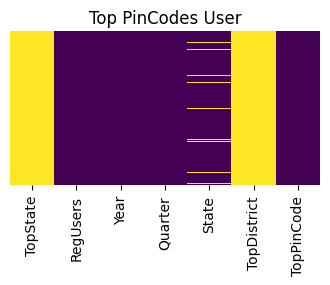

In [32]:
plot_heatmap(df_top_state_user,"Top States User")
plot_heatmap(df_top_dist_user,"Top District User")
plot_heatmap(df_top_pins_user,"Top PinCodes User")

In [33]:
print(f"Total rows: {len(df_top_dist_user)}")
print(f"Rows with null 'State': {df_top_dist_user['State'].isna().sum()}")
print(f"% missing: {df_top_dist_user['State'].isna().mean() * 100:.2f}%\n")

print(f"Total rows: {len(df_top_pins_user)}")
print(f"Rows with null 'State': {df_top_pins_user['State'].isna().sum()}")
print(f"% missing: {df_top_pins_user['State'].isna().mean() * 100:.2f}%")

Total rows: 8576
Rows with null 'State': 280
% missing: 3.26%

Total rows: 10280
Rows with null 'State': 280
% missing: 2.72%


In [34]:
# Droping missing values form state column
df_top_dist_user.dropna(subset=['State'], inplace=True)
df_top_pins_user.dropna(subset=['State'], inplace=True)

In [35]:
# droping un-necessary colums
df_top_state_user.drop(['State', 'TopDistrict','TopPinCode'],axis=1,inplace=True)
df_top_dist_user.drop(['TopState', 'TopPinCode'], axis=1, inplace=True)
df_top_pins_user.drop(['TopState','TopDistrict'], axis=1, inplace=True)

#### * Map Data

In [36]:
dataframes4 = {"Map Insurance":df_map_insu,"Map Transaction":df_map_trans,"Map User":df_map_user}

In [37]:
# displaying the first view of tables
for key,value in dataframes4.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Map Insurance table :
         name  count  amount  Year  Quarter State
0  puducherry    112     112  2020        2  None
1  tamil nadu   5473    5473  2020        2  None

Map Transaction table :
         name    count   amount  Year  Quarter State
0  puducherry   104212   104212  2018        1  None
1  tamil nadu  6726622  6726622  2018        1  None

Map User table :
    HoverName  RegUser  Year  Quarter State
0  puducherry    49318  2018        1  None
1  tamil nadu  2104754  2018        1  None



In [38]:
# displaying rows and columns of tables
for key,value in dataframes4.items():
  print(f"{key} shape is - {value.shape}")

Map Insurance shape is - (14558, 6)
Map Transaction shape is - (21612, 6)
Map User shape is - (21616, 5)


In [39]:
# displaying basic info of tables
for key,value in dataframes4.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14558 entries, 0 to 14557
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     14558 non-null  object
 1   count    14558 non-null  int64 
 2   amount   14558 non-null  int64 
 3   Year     14558 non-null  int64 
 4   Quarter  14558 non-null  int64 
 5   State    13876 non-null  object
dtypes: int64(4), object(2)
memory usage: 682.5+ KB
Map Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     21612 non-null  object
 1   count    21612 non-null  int64 
 2   amount   21612 non-null  int64 
 3   Year     21612 non-null  int64 
 4   Quarter  21612 non-null  int64 
 5   State    20604 non-null  object
dtypes: int64(4), object(2)
memory usage: 1013.2+ KB
Map Transaction
None

<class 'pandas.core.frame.DataFrame'>
RangeIn

In [40]:
# checking for duplicate values 
for key,value in dataframes4.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Map Insurance - 0
No. of duplicates in Map Transaction - 0
No. of duplicates in Map User - 0


In [41]:
# checking for missing values
for key,value in dataframes4.items():
  print(f"{key}\n{value.isna().sum()}\n")

Map Insurance
name         0
count        0
amount       0
Year         0
Quarter      0
State      682
dtype: int64

Map Transaction
name          0
count         0
amount        0
Year          0
Quarter       0
State      1008
dtype: int64

Map User
HoverName       0
RegUser         0
Year            0
Quarter         0
State        1008
dtype: int64



* Visualization of Missing values using heatmap

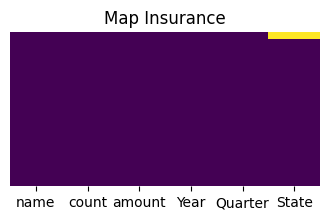

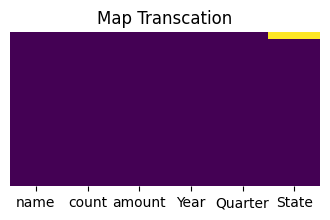

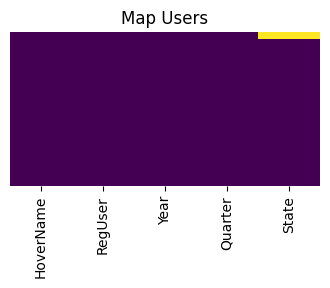

In [42]:
plot_heatmap(df_map_insu,"Map Insurance")
plot_heatmap(df_map_trans,"Map Transcation")
plot_heatmap(df_map_user,"Map Users")

### 3. Data Exploration

#### * Aggregated Data 


* Checking for correlations between variables


In [43]:
def plot_corr_matrix(df,title):
  correlation_matrix = df.corr(numeric_only=True)
  plt.figure(figsize=(3, 3))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f"{title}")
  plt.show()

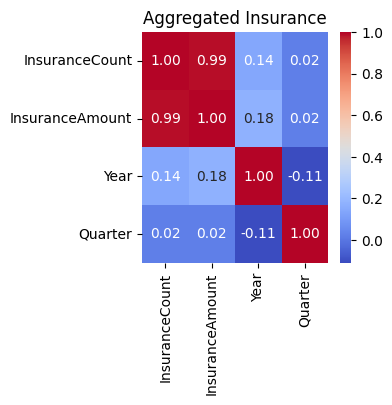

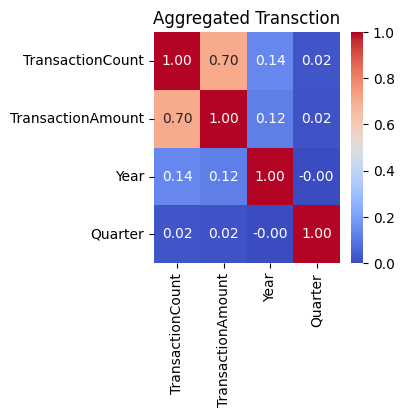

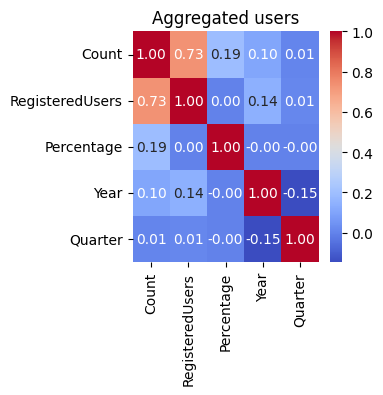

In [44]:
plot_corr_matrix(df_agg_insu,"Aggregated Insurance")
plot_corr_matrix(df_agg_trans,"Aggregated Transction")
plot_corr_matrix(df_agg_user,"Aggregated users")

#### * Top Data

##### 1. Insurance Data

TOP Insurance


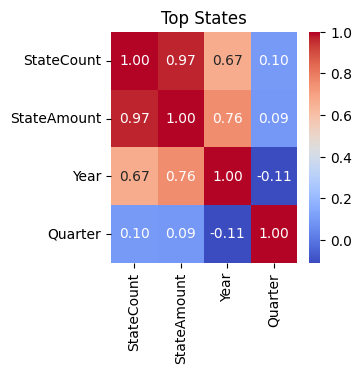

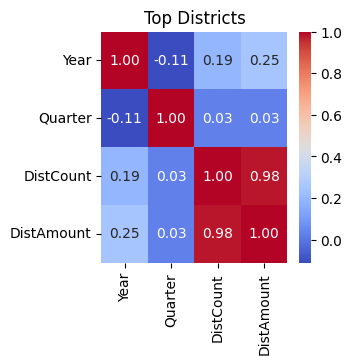

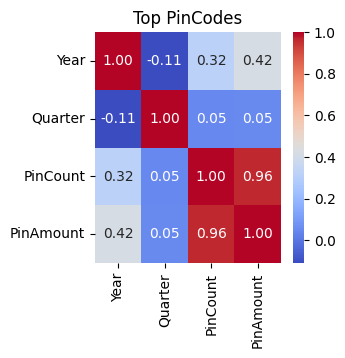

In [45]:
print("TOP Insurance")
plot_corr_matrix(df_top_state_insu,"Top States")
plot_corr_matrix(df_top_dist_insu,"Top Districts")
plot_corr_matrix(df_top_pins_insu,"Top PinCodes")

##### 2. Transcation data

TOP Transcation


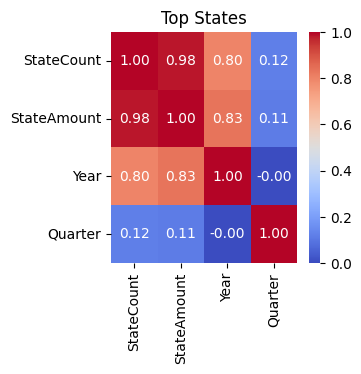

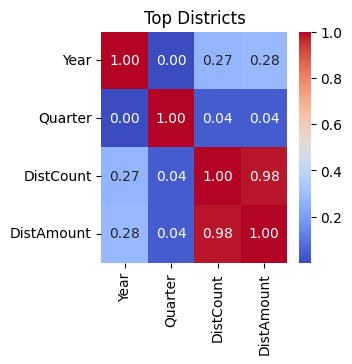

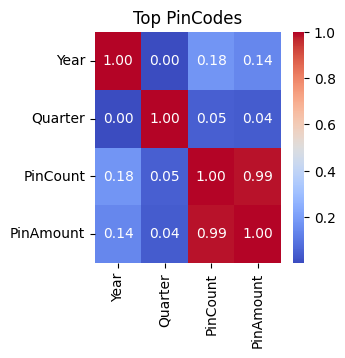

In [46]:
print("TOP Transcation")
plot_corr_matrix(df_top_state_trans,"Top States")
plot_corr_matrix(df_top_dist_trans,"Top Districts")
plot_corr_matrix(df_top_pins_trans,"Top PinCodes")

##### 3. User data 

TOP User


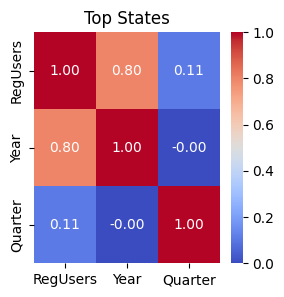

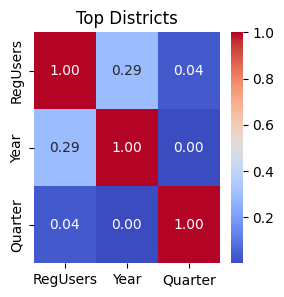

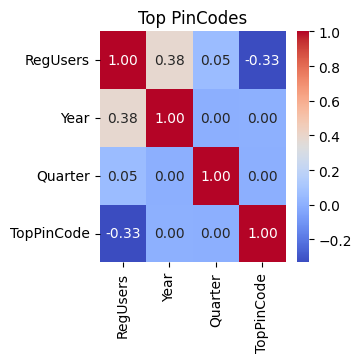

In [47]:
print("TOP User")
plot_corr_matrix(df_top_state_user,"Top States")
plot_corr_matrix(df_top_dist_user,"Top Districts")
plot_corr_matrix(df_top_pins_user,"Top PinCodes")

#### * Map Data

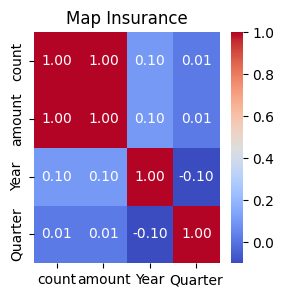

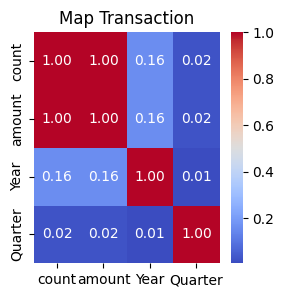

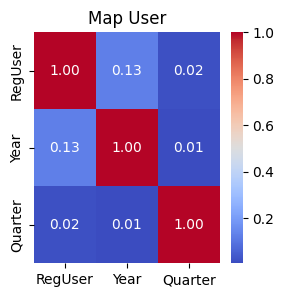

In [48]:
plot_corr_matrix(df_map_insu,"Map Insurance")
plot_corr_matrix(df_map_trans,"Map Transaction")
plot_corr_matrix(df_map_user,"Map User")

#### 

> After analyzing the correlation matrices across all available tables, we found no strong or meaningful correlations between most variables. However, a few variable pairs showed noticeable correlations:
>
> 1. **StateCount** and **StateAmount** - Form Top Data
> 2. **DistCount** and **DistAmount** -  Form Top Data
> 3. **PinCount** and **PinAmount** -  Form Top Data
> 4. **InsuranceCount** and **InsuranceAmount** -  Form Aggregated Data
> 5. **amount** and **count** -  Form Map Data
>
> To assess whether these observed correlations are statistically significant and meaningful for our analysis, we will perform hypothesis testing.



### 4. Data Visualization

##### Insurance

* Separating the national level and state level data 

In [49]:
# Create separate DataFrames
df_c_agg_insu = df_agg_insu[df_agg_insu['State'].isna()]
df_s_agg_insu = df_agg_insu[df_agg_insu['State'].notna()]

df_c_agg_insu.drop('State',axis=1,inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21916\3536736613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_agg_insu.drop('State',axis=1,inplace=True)


In [50]:
df_c_agg_insu.to_csv("./data files/agg_insurance_country_level.csv", index=False)
df_s_agg_insu.to_csv("./data files/agg_insurance_state_level.csv",index=False)
df_c_agg_insu.head()

,InsuranceCount,InsuranceAmount,Year,Quarter
0,185348,33732200.0,2020,2
1,354284,89495100.0,2020,3
2,248626,170980000.0,2020,4
3,318119,206307000.0,2021,1
4,363989,295067000.0,2021,2


* Bar Plot

  To Visualize State-wise and Country wise Total Insurance Amount, Total Insumrance Count


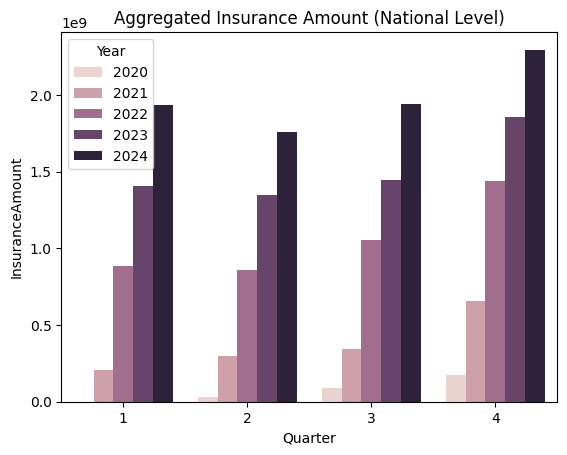

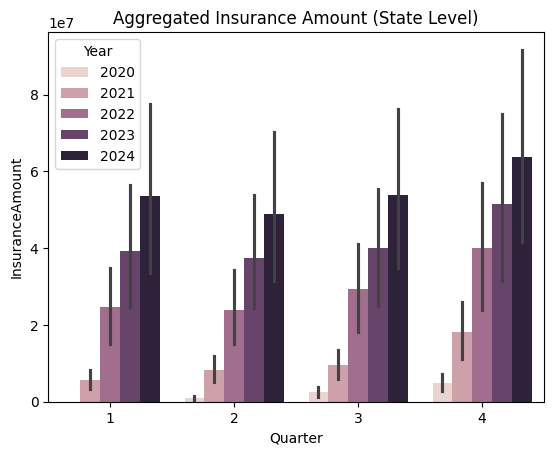

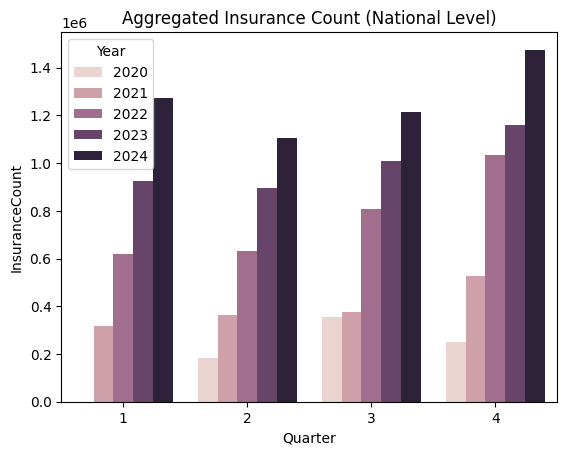

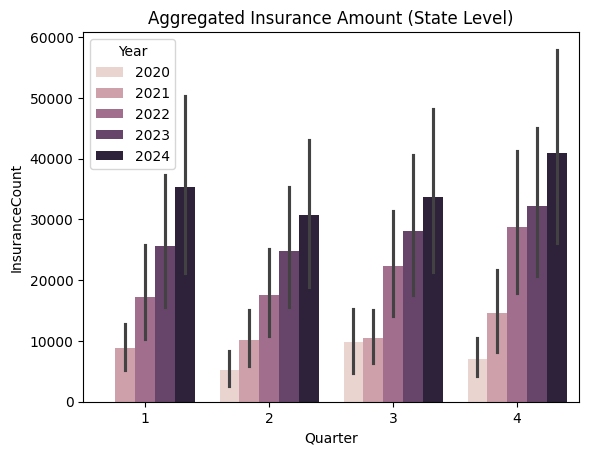

In [51]:
# Bar Plot 
sns.barplot(data=df_c_agg_insu, x='Quarter', y='InsuranceAmount', hue='Year')
plt.title('Aggregated Insurance Amount (National Level)')
plt.show()

sns.barplot(data=df_s_agg_insu, x='Quarter', y='InsuranceAmount', hue='Year')
plt.title('Aggregated Insurance Amount (State Level)')
plt.show()


sns.barplot(data=df_c_agg_insu, x='Quarter', y='InsuranceCount', hue='Year')
plt.title('Aggregated Insurance Count (National Level)')
plt.show()

sns.barplot(data=df_s_agg_insu, x='Quarter', y='InsuranceCount', hue='Year')
plt.title('Aggregated Insurance Amount (State Level)')
plt.show()

* Line Plot 

  To Visualize the trend of insurance with respect to time


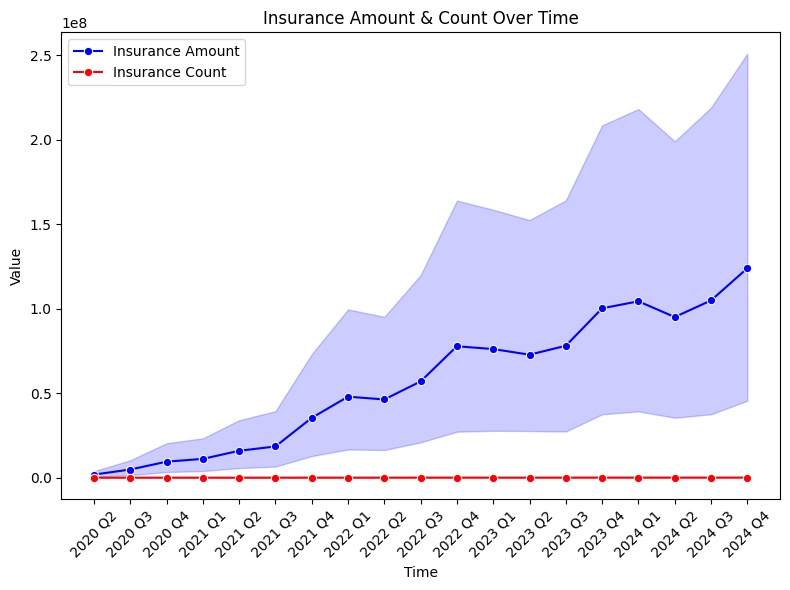

In [52]:
# creatin new time column
df_agg_insu['Time'] = df_agg_insu['Year'].astype(str) + ' Q' + df_agg_insu['Quarter'].astype(str)

# sorting time 
df_agg_insu = df_agg_insu.sort_values(['Year', 'Quarter'])

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_agg_insu, x='Time', y='InsuranceAmount', marker='o', color="blue", label='Insurance Amount')
sns.lineplot(data=df_agg_insu, x='Time', y='InsuranceCount', marker='o', color="red", label='Insurance Count')

plt.xticks(rotation=45)
plt.title('Insurance Amount & Count Over Time')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


* Pair plot 

<Figure size 800x600 with 0 Axes>

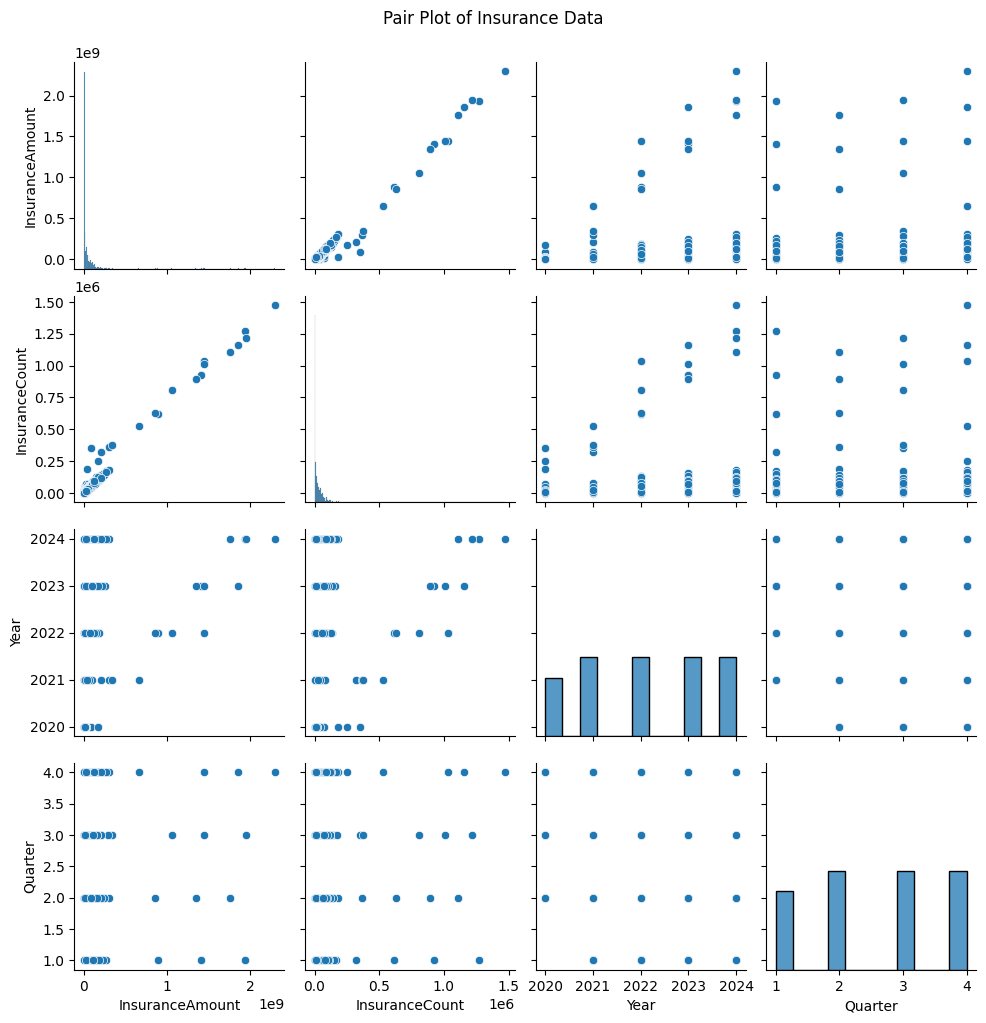

In [53]:
# Select relevant numeric columns
numeric_cols = ['InsuranceAmount', 'InsuranceCount', 'Year', 'Quarter']  

# Plot
plt.figure(figsize=(8,6))
sns.pairplot(df_agg_insu[numeric_cols])
plt.suptitle("Pair Plot of Insurance Data", y=1.02)
plt.show()


* Choropleth Map

In [54]:
import plotly.express as px
import plotly.offline as pyo

In [56]:
import json

file = '../phone pe/data files/states_india.geojson'
india_geojson = json.load(open(file,'r'))

geo_states = [feature['properties']['st_nm'] for feature in india_geojson['features']]
print(sorted(geo_states))

['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'NCT of Delhi', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [134]:
df_s_agg_insu['State'] = df_s_agg_insu['State'].str.replace('-', ' ').str.title()
df_s_agg_insu['State'].unique()

C:\Users\aasth\AppData\Local\Temp\ipykernel_21916\3719417051.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli & Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [136]:
# Prepare Data
df = df_s_agg_insu.copy()

# Create a dynamic Plotly choropleth with dropdowns
fig = px.choropleth(
    df,
    geojson=india_geojson,
    locations='State',
    featureidkey='properties.st_nm',
    color='InsuranceAmount',
    animation_frame='Quarter',  
    animation_group='Year',     
    scope='asia',
    color_continuous_scale='Purples',
    title='Insurance Count by State',
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# Add dropdown for year selection
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'restyle',
                    'label': str(yr),
                    'args': [{'transforms': [dict(
                        type='filter',
                        target=df['Year'],
                        operation='=',
                        value=yr
                    )]}]
                } for yr in sorted(df['Year'].unique())
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.1,
            'yanchor': 'top'
        }
    ]
)

pyo.plot(fig, filename="map.html")

'map.html'

#### Transaction

* Seperating the Transaction data State wise and Country wise

In [60]:
df_agg_trans.head()

,TransactionType,TransactionCount,TransactionAmount,Year,Quarter,State
0,Recharge & bill payments,72550406,1.447270e+10,2018,1,None
1,Peer-to-peer payments,46982705,1.472460e+11,2018,1,None
2,Merchant payments,5368669,4.656680e+09,2018,1,None
3,Financial Services,3762820,8.158530e+08,2018,1,None
4,Others,5761576,4.643220e+09,2018,1,None


In [ ]:
# Create separate DataFrames
df_c_agg_trans = df_agg_trans[df_agg_trans['State'].isna()]
df_s_agg_trans = df_agg_trans[df_agg_trans['State'].notna()]

df_c_agg_trans.drop('State',axis=1,inplace=True)

In [64]:
# Creating csv file
df_c_agg_trans.to_csv("./data files/agg_transcation_country_level.csv", index=False)
df_s_agg_trans.to_csv("./data files/agg_transcation_state_level.csv",index=False)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21916\3434742628.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




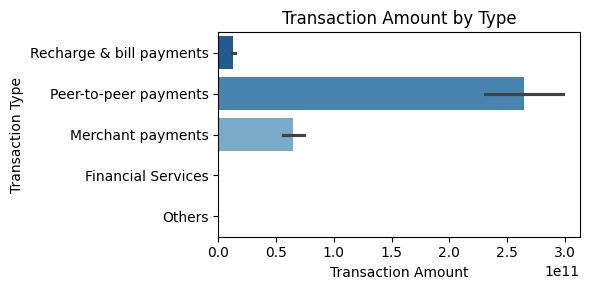

In [84]:
plt.figure(figsize=(6,3))
sns.barplot(x='TransactionAmount', y='TransactionType', data=df_s_agg_trans, palette='Blues_r')
plt.title("Transaction Amount by Type")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Type")
plt.tight_layout()
plt.show()

C:\Users\aasth\AppData\Local\Temp\ipykernel_21916\1964766112.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




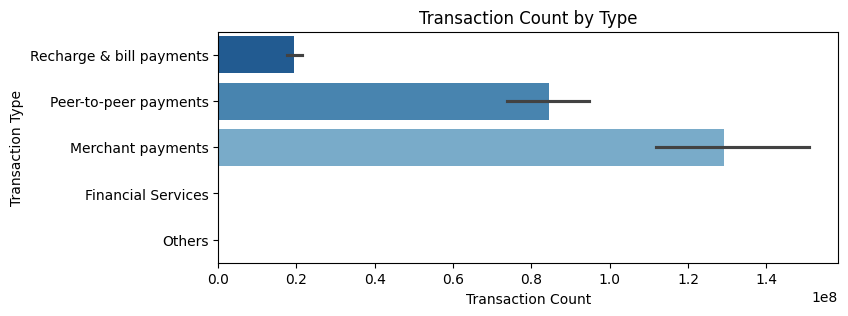

In [83]:
plt.figure(figsize=(8,3))
sns.barplot(x='TransactionCount', y='TransactionType', data=df_s_agg_trans, palette='Blues_r')
plt.title("Transaction Count by Type")
plt.xlabel("Transaction Count")
plt.ylabel("Transaction Type")
plt.show()

* Pie chart 

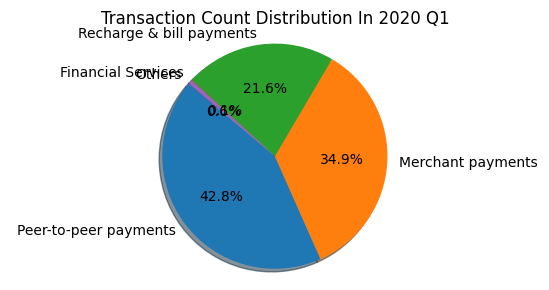

In [86]:
year = 2020
quarter = 1

filtered_df = df_c_agg_trans[(df_c_agg_trans['Year'] == year) & (df_c_agg_trans['Quarter'] == quarter)]

plt.figure(figsize=(6, 3))
plt.pie(
    filtered_df['TransactionCount'],
    labels=filtered_df['TransactionType'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title(f"Transaction Count Distribution In {year} Q{quarter}")
plt.axis('equal')  
plt.tight_layout()
plt.show()


* Line Plot

  From the line plot, we can observe that the transaction amount fluctuates over time, whereas the transaction count remains relatively stable with no significant variation

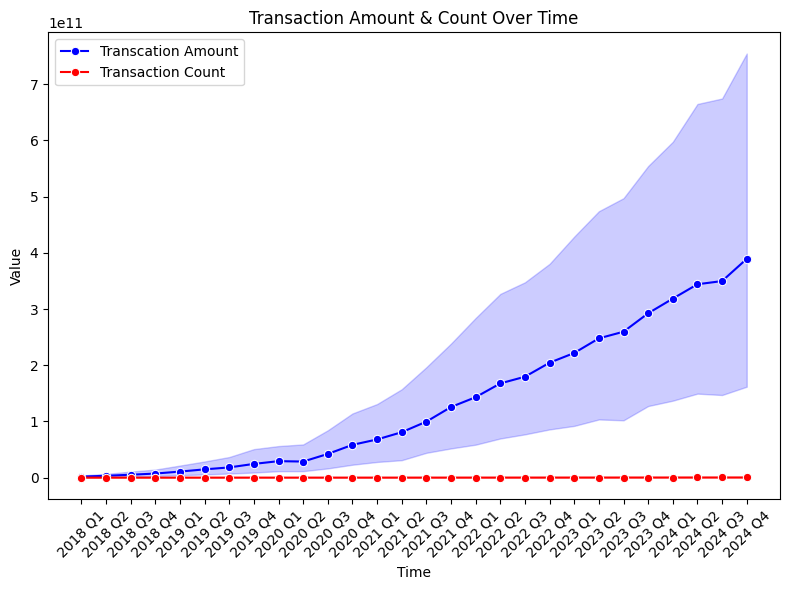

In [88]:
# creatin new time column
df_agg_trans['Time'] = df_agg_trans['Year'].astype(str) + ' Q' + df_agg_trans['Quarter'].astype(str)

# sorting time 
df_agg_trans = df_agg_trans.sort_values(['Year', 'Quarter'])

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_agg_trans, x='Time', y='TransactionAmount', marker='o', color="blue", label='Transcation Amount')
sns.lineplot(data=df_agg_trans, x='Time', y='TransactionCount', marker='o', color="red", label='Transaction Count')

plt.xticks(rotation=45)
plt.title('Transaction Amount & Count Over Time')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

#### User

* Seperate the Country level and State level data

In [ ]:
# Create separate DataFrames
df_c_agg_user = df_agg_user[df_agg_user['State'].isna()]
df_s_agg_user = df_agg_user[df_agg_user['State'].notna()]

df_c_agg_user.drop('State',axis=1,inplace=True)

In [101]:
df_c_agg_user.to_csv("./data files/agg_user_country_level.csv", index=False)
df_s_agg_user.to_csv("./data files/agg_user_state_level.csv",index=False)
df_s_agg_user.head()

,Brand,Count,RegisteredUsers,Percentage,Year,Quarter,State
187,Xiaomi,1665,6740,0.247033,2018,1,andaman-&-nicobar-islands
188,Samsung,1445,6740,0.214392,2018,1,andaman-&-nicobar-islands
189,Vivo,982,6740,0.145697,2018,1,andaman-&-nicobar-islands
190,Oppo,501,6740,0.074332,2018,1,andaman-&-nicobar-islands
191,OnePlus,332,6740,0.049258,2018,1,andaman-&-nicobar-islands


* Barplot

  Country Level and State Level

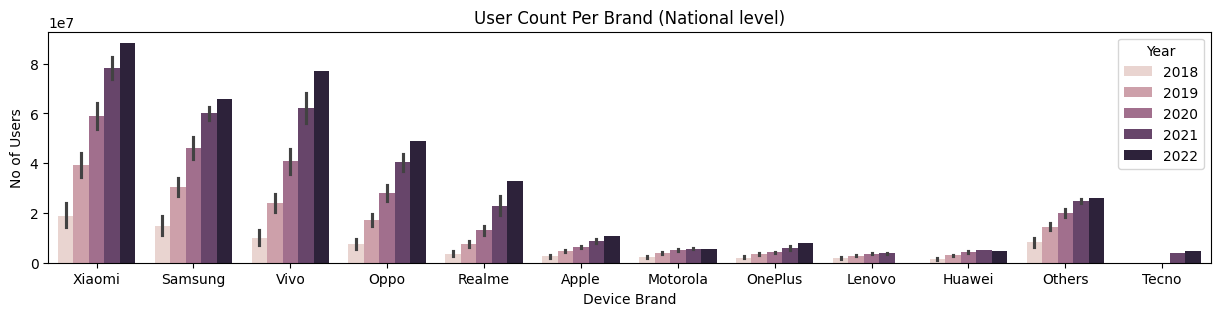

In [96]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_c_agg_user, x='Brand', y='Count', hue='Year')
plt.xlabel("Device Brand")
plt.ylabel("No of Users")
plt.title('User Count Per Brand (National level)')
plt.show()

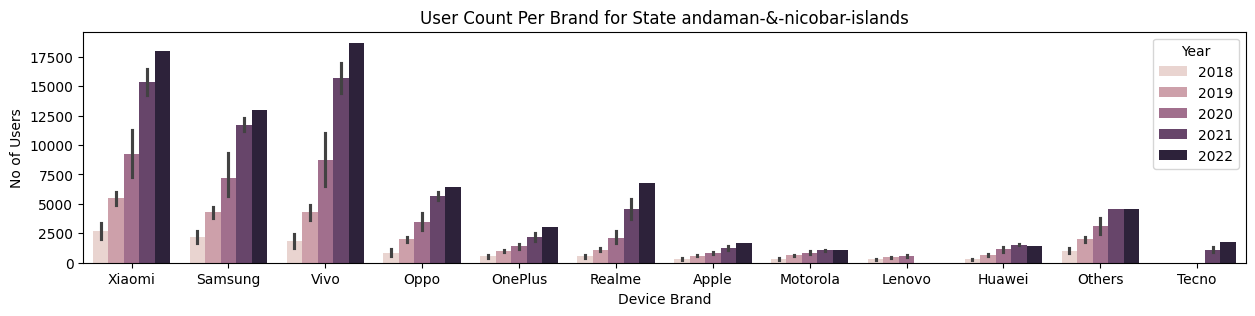

In [99]:
selected_state = 'andaman-&-nicobar-islands'
filtered_df = df_s_agg_user[(df_s_agg_user['State'] == selected_state)]
plt.figure(figsize=(15,3))
sns.barplot(data=filtered_df, x='Brand', y='Count', hue='Year')
plt.xlabel("Device Brand")
plt.ylabel("No of Users")
plt.title(f"User Count Per Brand for State {selected_state}")
plt.show()

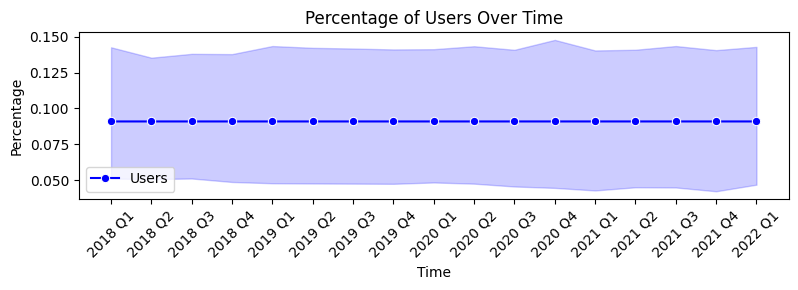

In [111]:
# creatin new time column
df_c_agg_user['Time'] = df_c_agg_user['Year'].astype(str) + ' Q' + df_c_agg_user['Quarter'].astype(str)

# sorting time 
df_c_agg_user = df_c_agg_user.sort_values(['Year', 'Quarter'])

# Plot
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_c_agg_user, x='Time', y='Percentage', marker='o', color="blue", label='Users')

plt.xticks(rotation=45)
plt.title('Percentage of Users Over Time')
plt.legend()
plt.tight_layout()
plt.show()

#### Top Data

In [ ]:
# Insurance data
df_top_state_insu.to_csv("./data files/top_states_insu.csv", index=False)
df_top_dist_insu.to_csv("./data files/top_dist_insu.csv",index=False)
df_top_pins_insu.to_csv("./data files/top_pins_insu.csv",index=False)

# Transaction data
df_top_state_trans.to_csv("./data files/top_states_trans.csv",index=False)
df_top_dist_trans.to_csv("./data files/top_dist_trans.csv",index=False)
df_top_pins_trans.to_csv("./data files/top_pins_trans.csv",index=False)

# user Data
df_top_state_user.to_csv("./data files/top_states_user.csv",index=False)
df_top_dist_user.to_csv("./data files/top_dist_user.csv",index=False)
df_top_pins_user.to_csv("./data files/top_pins_user.csv",index=False)

* Choropleth map for transaction map data 

In [143]:
df_map_insu.head()

,name,count,amount,Year,Quarter,State
0,puducherry,112,112,2020,2,None
1,tamil nadu,5473,5473,2020,2,None
2,uttar pradesh,9884,9884,2020,2,None
3,madhya pradesh,6283,6283,2020,2,None
4,andhra pradesh,22104,22104,2020,2,None


In [ ]:
df_c_map_insu = df_map_insu[df_map_insu['State'].isna()]
df_s_map_insu = df_map_insu[df_map_insu['State'].notna()]

df_c_map_insu.drop('State',axis=1,inplace=True)
df_c_map_insu.rename(columns={"name":"State"},inplace=True)